In [1]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
import argparse
import imutils
import pickle
import cv2
import os

In [2]:
print('[INFO] loading network...')
model = load_model('model.h5')
lb = pickle.loads(open('label.pickle', 'rb').read())

[INFO] loading network...


In [3]:
image_path = 'test/psyduck1.jpg'
image = cv2.imread(image_path)
output = image.copy()

In [4]:
image = cv2.resize(image, (128, 128))
image = image.astype('float') / 255.0
image = img_to_array(image)
image = np.expand_dims(image, axis=0)

In [5]:
print('[INFO] classifying image...')
proba = model.predict(image)[0]
idx = np.argmax(proba)
label = lb.classes_[idx]

[INFO] classifying image...


In [6]:
filename = image_path[image_path.rfind(os.path.sep) + 1:]
correct = 'correct' if filename.rfind(label) != -1 else 'incorrect'

In [7]:
label = '{}: {:.2f}% ({})'.format(label, proba[idx] * 100, correct)
output = imutils.resize(output, width=400)
cv2.putText(output, label, (10, 25),  cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2);

[INFO] psyduck: 99.99% (correct)


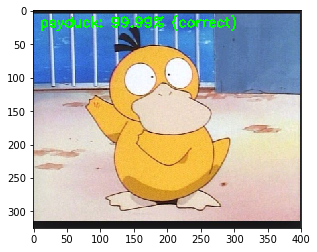

In [8]:
print('[INFO] {}'.format(label))
output = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
plt.imshow(output)